# Question 1

The notes on linear algebra contain an example on singular value decomposition. See the slide entitled, 'Modelling "Person" -- SVD'. Write python code to reproduce the calculations related to the calculation of the prediction of Alice's rating of the movie "Eat Pray Love". The answer to be reproduced is shown on the slide entitled 'Example for SVD-based recommendation'.

In [5]:
import numpy as np

A = [
    [3, 1, 2, 3],
    [4, 3, 4, 3],
    [3, 2, 1, 5],
    [1, 6, 5, 2]
]

u, s, v = np.linalg.svd(A)

u = [i[:2] for i in u]

s = np.multiply(s, np.identity(4))

s = [i[:2] for i in s]
v = [i[:2] for i in v.T]

# switched u and v
sv = np.dot(s[:2], u[3])
usv = np.dot(v[0], sv)

prediction = 4 + usv
print 'prediction is: %.2f' % prediction


prediction is: 5.35


# Question 2

Compute the SVD for the matrix below:

In [3]:
import numpy as np

A = np.array([
    [1,2,3],
    [2,3,4],
    [4,5,6],
    [1,1,1]
])

u,s,v = np.linalg.svd(A)

# Question 3

The left figure above represents the surface. The right figure represents 50 of the singular values. Compute the best rank(2) matrix, A2, approximation to the matrix A. What is ||A - A2||?


In [8]:
import numpy as np
import math

e = lambda i: -0.7 + 0.001 * (i - 1)
r = range(1, 1402)
k = 2 # finding best rank2

# generate A
A = [[math.sqrt(1 - e(i) ** 2 - e(j) ** 2) for j in r] for i in r]

u, s, vt = np.linalg.svd(A)

vtk = vt[:k] # first two rows of v transpose (k x n)

# for uk we get each column as a row with this, so we transpose it
uk  = np.array([u[:, i] for i in range(0, k)]).T # first k columns of u (n x k)
sk  = np.multiply(np.identity(k), s[:k]) # first k singular values (k x k)

Ak = np.dot(uk, np.dot(sk, vtk)) # (n x k) x ((k x k) x (k x n)) = (n x n)

assert np.shape(Ak) == (len(r), len(r))
assert np.linalg.matrix_rank(Ak) == 2

We can determine the euclidean norm of A - A_(k=2) by looking at the third largest singular value of S from the singular value decomposition of A

In [20]:
from numpy.testing import assert_almost_equal

r = range(0, 1401)

t = lambda i, j: (A[i][j] - Ak[i][j]) ** 2

norm = math.sqrt(sum([sum([t(i, j) for j in r]) for i in r]))
assert_almost_equal(np.linalg.norm(A - Ak), norm)

# Question 4

Using the matrix A from Question 2, and let b = [1,1,1,1]T, using the gradient descent method, determine the least squares solution of:

In [63]:
tolerance = 0.01
stepsize = 0.01 # E

A = np.array([
    [1,2,4,1],
    [2,3,5,1],
    [3,4,6,1]
]).T

b = np.array([1,1,1,1])


x, res, rank, sv = np.linalg.lstsq(A,b)

print x

[-0.14705882  0.05882353  0.26470588]


In [23]:
import numpy as np
import warnings
from ipy_table import *

warnings.filterwarnings("ignore", category=RuntimeWarning)

table = [["Step Size", "Iterations", "x"]]
tolerance = 0.01

A = np.array([
    [1,2,3],
    [2,3,4],
    [4,5,6],
    [1,1,1]
])

b = np.array([1,1,1,1])

r = {}

# t = lambda x: np.dot(A.T, np.dot(A, x)) - np.dot(A.T, b)

def t (x):
    try:
        return np.dot(A.T, np.dot(A, x)) - np.dot(A.T, b)
    except RuntimeWarning:
        return x
ix = x = np.random.rand(3)

for stepsize in [0.01,0.05,0.1,0.15,0.2,0.25,0.5]:
    x = ix
    iterations = 0
    while np.linalg.norm(t(x), 2) > tolerance:
        try:
            x = x - np.dot(stepsize, t(x))
        except RuntimeWarning:
            break;
        iterations += 1
    table.append([stepsize, iterations, x])
make_table(table)

# Question 5

From the properties of an svd, the null space of an m * n matrix A is spanned by the last (n-r) columns of V (where r is rank(A))

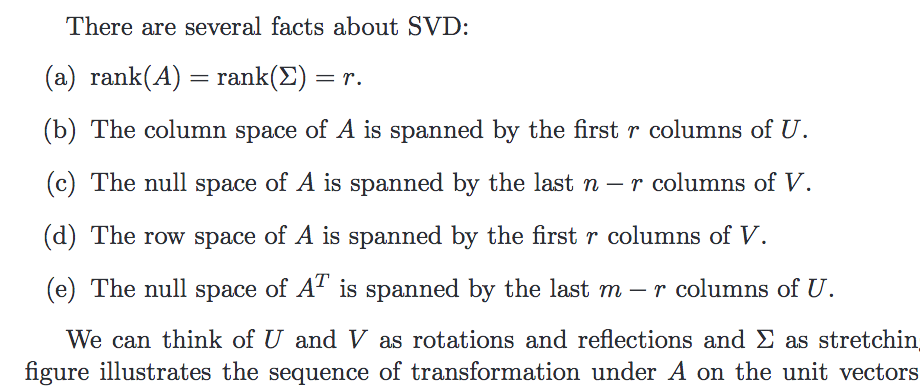

In [57]:
from IPython.display import Image

Image('./rules.png')

In [56]:
import numpy as np

A = [
    [3, 2, -1, 4],
    [1, 0, 2, 3],
    [-2, -2, 3, -1]
]

u, s, vt = np.linalg.svd(A)

r = np.linalg.matrix_rank(A)
m, n = np.shape(A)

V = vt.T

columns = [V[:,(n - 1) - i] for i in range(0, r)]
print 'two l.i vectors of null(A)\n'
print "\n".join([str(i) for i in columns])

print 'if columns are l.i in R3, col(A) will have 4 terms'

print 'the column space of A is spanned by the first r columns of U'
print 'since r is only 2, the above columns are not li in R3'

columns = [u[:, i] for i in range(0, r)]
print "\n".join([str(i) for i in columns])

print 'the row space of A is spanned by the first R columns of V'

columns = [V[:, i] for i in range(0, r)]
print "\n".join([str(i) for i in columns])
print 'again, only 2 rows needed to span row space'
print 'its not LI in R4'

two l.i vectors of null(A)

[-0.04453418  0.85004094  0.44341588 -0.28076586]
[ 0.8290113  -0.2330726   0.24969281 -0.44279897]
if columns are l.i in R3, col(A) will have 4 terms
the column space of A is spanned by the first r columns of U
since r is only 2, the above columns are not li in R3
[ 0.81049889  0.31970025 -0.49079864]
[ 0.0987837   0.75130448  0.65252078]
the row space of A is spanned by the first R columns of V
[ 0.55385992  0.38616463 -0.24385636  0.69616819]
[-0.0632152  -0.27200083  0.82557249  0.49035646]
again, only 2 rows needed to span row space
its not LI in R4


# Question 6

In a certain place it rains on *one third of the days.* The local evening newspaper attempts to predict whether or not it will rain the following day. Three quarters of rainy days and three fifths of dry days are correctly predicted by the previous evening's paper. Given that this evening's paper predicts rain, what is the probability that it will actually rain tomorrow?

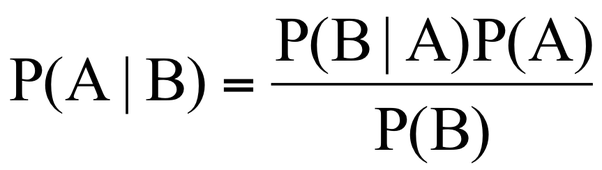

In [1]:
from IPython.display import Image

Image('./bayes.png')

We'll let `A` be the probability it rains, which is one out of three. While `Pr(B|A)` being the probability of the correction being accurately predicted from the previous night's paper. We solve for `Pr(A|B)`.

In [14]:
P_A = 1.0 / 3.0 # chance it rains
P_BA = 3.0 / 4.0 # chance that rains predicted given it rained
P_DRY = 3.0 / 5.0 # chance that it is predicted to be dry

"""
 P_B being
  - (chance it rains AND rain is predicted)
  OR 
  - (not chance it rain AND not chance predicted its dry))
  
  P_A * P_BA + not(P_A) * not(P_DRY)
"""
P_B = (P_A * P_BA) + (1.0 - P_A) * (1 - P_DRY)

P_AB = (P_A * P_BA) / P_B

print "%.2f" % P_AB

0.48


Therefore, there is a 48% chance it rains, given the prediction.

# Question 7

A machine is built to make mass-produced items. Each item made by the machine has a probability p of being defective. Given the value of p, the items are independent of each other. Because of the way in which the machines are made, p could take one of several values. In fact p = X/100 where X has a discrete uniform distribution on the interval [0, 5]. The machine is tested by counting the number of items made before a defective is produced. Find the conditional probability distribution of X given that the first defective item is the thirteenth to be made

In [1]:
from ipy_table import *
t = [["Pr( X = i | D )"]]

PDX = lambda i: ((1 - i / 100.0) ** (13 - 1)) * (i / 100.0)
PX = 1.0 / 6.0
r = range(0, 6)
# bayes
PXiD = lambda i: (PDX(i) * PX) / (sum([(PX * PDX(j)) for j in r]))

for i in r:
    t.append([PXiD(i)])
make_table(t)

# Question 8

Calculate the diversity (a.k.a. entropy) associated with the population of strings given below.

In [11]:
import numpy as np
M = np.array([
    [1, 0, 1, 0, 1, 0, 1],
    [0, 1, 0, 1, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 1]
]).T

entropies = []
for term in M:
    m = {0: 0.0, 1: 0.0}
    total = len(term)
    
    Pi = lambda v: (v / total)
    expr = lambda v: Pi(m[i]) * np.log(Pi(m[i]))
    
    [m.__setitem__(k, (m[k] + 1)) for k in term]
    
    entropy = sum([expr(i) for i in m])

    entropies.append(entropy)

joint_entropy = -1 * sum(entropies)

print "%.2f" % joint_entropy

4.71


# Question 9

Given the following string is representative of the symbol frequency used in a system,
and assuming no noise in any communication of those symbols, compute the number of bits that would be needed
to send a symbol.

`ABCDEACDEADEAE`

Assuming 20% noise is associated with any communication, how many bits are now required?
HINT: Think of noise as a separate symbol.

In [40]:
# apparantly did this wrong as well (decrease each terms potency by noise!!)
r = 'ABCDEACDEADEAE'
l = len(r)
m = {}
[m.__setitem__(k, (m[k] + 1) if m.has_key(k) else 1.0) for k in r]

noise = 0.2 * l

total = sum([m[i] for i in m])
Pi = lambda v: (v / total)

entropy = -1 * sum([Pi(m[i]) * np.log(Pi(m[i])) for i in m])
print "entropy: %.2f" % entropy
print "to represent length %d string %s would require %d bits if string was encoded optimally" % (l, r, round(entropy * l))
# To represent a ten character string AAAAABBCDE would require 20 bits if the string were encoded optimally.


# with noise
entropy += -1 * (Pi(noise) * np.log(Pi(noise)))

print "entropy w/ noise: %.2f" % entropy
print "to represent length %d string %s would require %d bits if string was encoded optimally (w/ noise)" % (l, r, round(entropy * l))


entropy: 1.51
to represent length 14 string ABCDEACDEADEAE would require 21 bits if string was encoded optimally
entropy w/ noise: 1.83
to represent length 14 string ABCDEACDEADEAE would require 26 bits if string was encoded optimally (w/ noise)


# Question 10
--------------------
Find the KL divergence DL<sub>KL</sub>(P||Q) given p(x) = 位<sup>-位x</sup> and q(x) = 位<sub>0</sub><sup>-位<sub>0</sub>x</sup>.

$$DL_{KL}(P || Q) = E_{x\sim{}P}[log(P(x) - log(Q(x)]$$
$$= E_{x\sim{}P}[-x(\lambda{}log(\lambda{}) - \lambda{}_0log(\lambda{}_0))]$$
$$= \sum_{x \in{} X}^{} -P(x)(\lambda{}log(\lambda{}) - \lambda{}_0log(\lambda{}_0))x$$
$$= -\lambda{}log(\lambda{}) + \lambda{}_0log(\lambda{}_0)\sum_{x \in{} X}^{} \frac{x}{\lambda{}^{\lambda{}x}}$$